In [1]:
#importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns',None)

# Loading the dataset

In [2]:
BOOKS=pd.read_csv("c://users/saurav/desktop/books.csv",encoding="latin-1")
BOOKS.columns
BOOKS.head(4)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...


In [3]:
RATINGS=pd.read_csv("c://Users/saurav/desktop/rating.csv",encoding="latin-1")
RATINGS.columns
RATINGS.head(8)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5


# Performing the EDA

In [39]:
BOOKS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [4]:
BOOKS['original_publication_year'].unique()

array([ 2008.,  1997.,  2005.,  1960.,  1925.,  2012.,  1937.,  1951.,
        2000.,  1813.,  2003.,  2011.,  1949.,  1945.,  1947.,  2009.,
        1999.,  1954.,  2010.,  2002.,  1998.,  2007.,  1595.,  1988.,
        1993.,  1950.,  1996.,  2006.,  1868.,  1847.,  2001.,  1953.,
        1974.,  1979.,  1932.,  1884.,  1952.,  2015.,  1995.,  2004.,
        1969.,  1936.,  1985.,  1818.,  1977.,  1811.,  -720.,  1946.,
        1859.,  1990.,  1964.,  1989.,  1958.,  1973.,  1967.,  1911.,
        1891.,  1897.,  1963.,  1844.,  2013.,  1862.,  1961.,  1876.,
        1962.,  1955.,  1991.,  1600.,  1965.,  1939.,  1908.,  1850.,
        2014.,  1606.,  1860.,  1942.,  1978.,  1815.,  1877.,  1986.,
        1866.,  1922.,  1987.,  1851.,  1982.,  1843.,  1976.,  1994.,
        1915.,  1956.,    nan,  1980.,  1865.,  1817.,  1957.,  1926.,
        1943.,  1938.,  1966.,  1981.,  2016.,  1992.,  1984.,  1972.,
        1882.,  1895.,  1899.,  1983.,  -750.,  1900.,  1975.,  1971.,
      

In [40]:
BOOKS.shape

(10000, 23)

In [41]:
RATINGS.shape

(981756, 3)

##Graphical representation

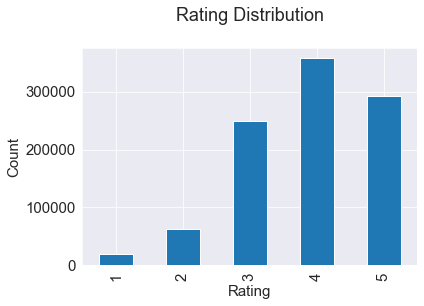

In [6]:
plt.rc("font", size=15)
RATINGS.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

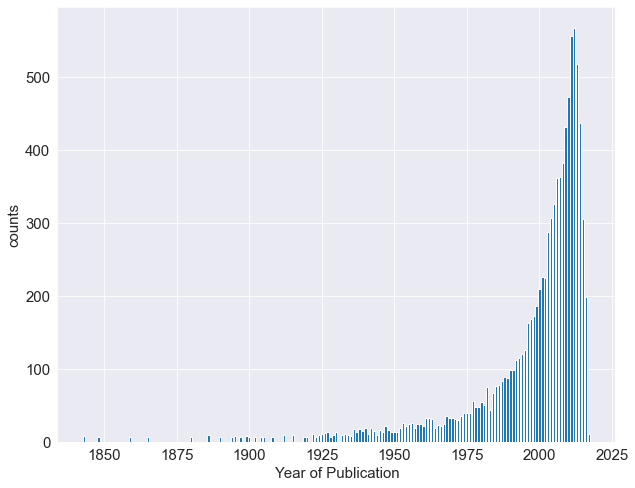

In [7]:
year = BOOKS.original_publication_year.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

In [18]:
new_book_df= pd.merge(BOOKS, RATINGS, on='book_id')
new_book_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1
2,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2
3,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3
4,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3


In [19]:
new_book_df.shape

(79701, 25)

In [20]:
book_pivot=new_book_df.pivot_table(columns='user_id',index='title',values='rating')

In [22]:
book_pivot.fillna(0,inplace=True)

In [25]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)
type(book_sparse)

scipy.sparse.csr.csr_matrix

# Using Knearest neighbor Algorithm

In [28]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='auto')
model.fit(book_sparse)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [33]:
book_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [35]:
query_index = np.random.choice(book_pivot.shape[0])
print(query_index)
distances, indices = model.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

772


In [36]:
book_pivot.index[query_index]

'V.'

In [38]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for V.:

1: Ghostwritten, with distance of 47.02127178203499:
2: Loving What Is: Four Questions That Can Change Your Life, with distance of 47.58150901348127:
3: Nine Stories, with distance of 48.16637831516918:
4: Confessions of a Shopaholic (Shopaholic, #1), with distance of 49.18333050943175:
